<a href="https://colab.research.google.com/github/KishorAlagappan/Customer_Conversion_Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns


# Visualization modifires
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# MODEL BUILDING
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score


# To supress warnings
import warnings 
warnings.filterwarnings("ignore")   

In [ ]:
df = pd.read_csv('/content/Customer_data.csv')

In [ ]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [ ]:
# Shape of the data :
df.shape

(45211, 11)

In [ ]:
# Dataframe information :
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


* From above output we can observe that 7 categorical & 4 numerical Attributes.

In [ ]:
# Describing the data :
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Handling Duplicates

In [ ]:
df.duplicated().sum()

6

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(45205, 11)

* There are 6 duplicate records present in our dataset.
* I removed those 6 records

Unique Values

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
for col in df.select_dtypes(include= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------------------------------------
day : [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
--------------------------------------------
dur : [ 261  151   76 ... 1298 1246 1556]
--------------------------------------------
num_calls : [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
--------------------------------------------


In [ ]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

The dur column has more unique values comparing other columns

In [ ]:
for col in df.select_dtypes(exclude= np.number).columns:
  print(f'{col} : {df[col].unique()}')
  print('--------------------------------------------')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------
marital : ['married' 'single' 'divorced']
--------------------------------------------
education_qual : ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------
call_type : ['unknown' 'cellular' 'telephone']
--------------------------------------------
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------------------------------
prev_outcome : ['unknown' 'failure' 'other' 'success']
--------------------------------------------
y : ['no' 'yes']
--------------------------------------------


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

* There are no null values currently because the null values are all filled with "unknown".

Handling Null

In [ ]:
#to count the unknown values present in the dataframe 
has_unknown = df == "unknown"
columnwise_results = has_unknown.sum()
columnwise_results

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [ ]:
for col in df.select_dtypes(exclude=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts()}')
  print('--------------------------------------------')

job : 
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------
marital : 
married     27210
single      12788
divorced     5207
Name: marital, dtype: int64
--------------------------------------------
education_qual : 
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64
--------------------------------------------
call_type : 
cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64
--------------------------------------------
mon : 
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64
----------------

In [ ]:
prev = df['prev_outcome'].value_counts()/len(df)*100
prev

unknown    81.745382
failure    10.841721
other       4.070346
success     3.342551
Name: prev_outcome, dtype: float64

* **Nearly 37,000 of values are missing that is 81% in the prev_outcome column**

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
  print(f'{col} : ')
  print(f'{df[col].value_counts().head()}')
  print('--------------------------------------------')

age : 
32    2084
31    1996
33    1972
34    1929
35    1894
Name: age, dtype: int64
--------------------------------------------
day : 
20    2752
18    2308
21    2026
17    1939
6     1932
Name: day, dtype: int64
--------------------------------------------
dur : 
124    187
90     184
89     177
104    175
122    175
Name: dur, dtype: int64
--------------------------------------------
num_calls : 
1    17542
2    12503
3     5521
4     3520
5     1764
Name: num_calls, dtype: int64
--------------------------------------------


we can fill the null value with the mode value because we are having high difference between the value counts.

In [ ]:
df.replace("unknown", np.nan, inplace=True)

In [ ]:
df.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [ ]:
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Handling Outliers

checking outliers

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [ ]:
num_columns = df.select_dtypes(include=np.number).columns
num_columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [ ]:
def Boxplot(col):
    plt.figure(figsize=(15, 10))
    x=1
    for i in col:
        plt.subplot(2, 2, x)
        sns.boxplot(x=i, data=df, palette='Paired')
        plt.title(f'Box plot of {i}', fontweight='black', fontsize=20, pad=20 )
        x += 1
    plt.tight_layout()
    plt.show()

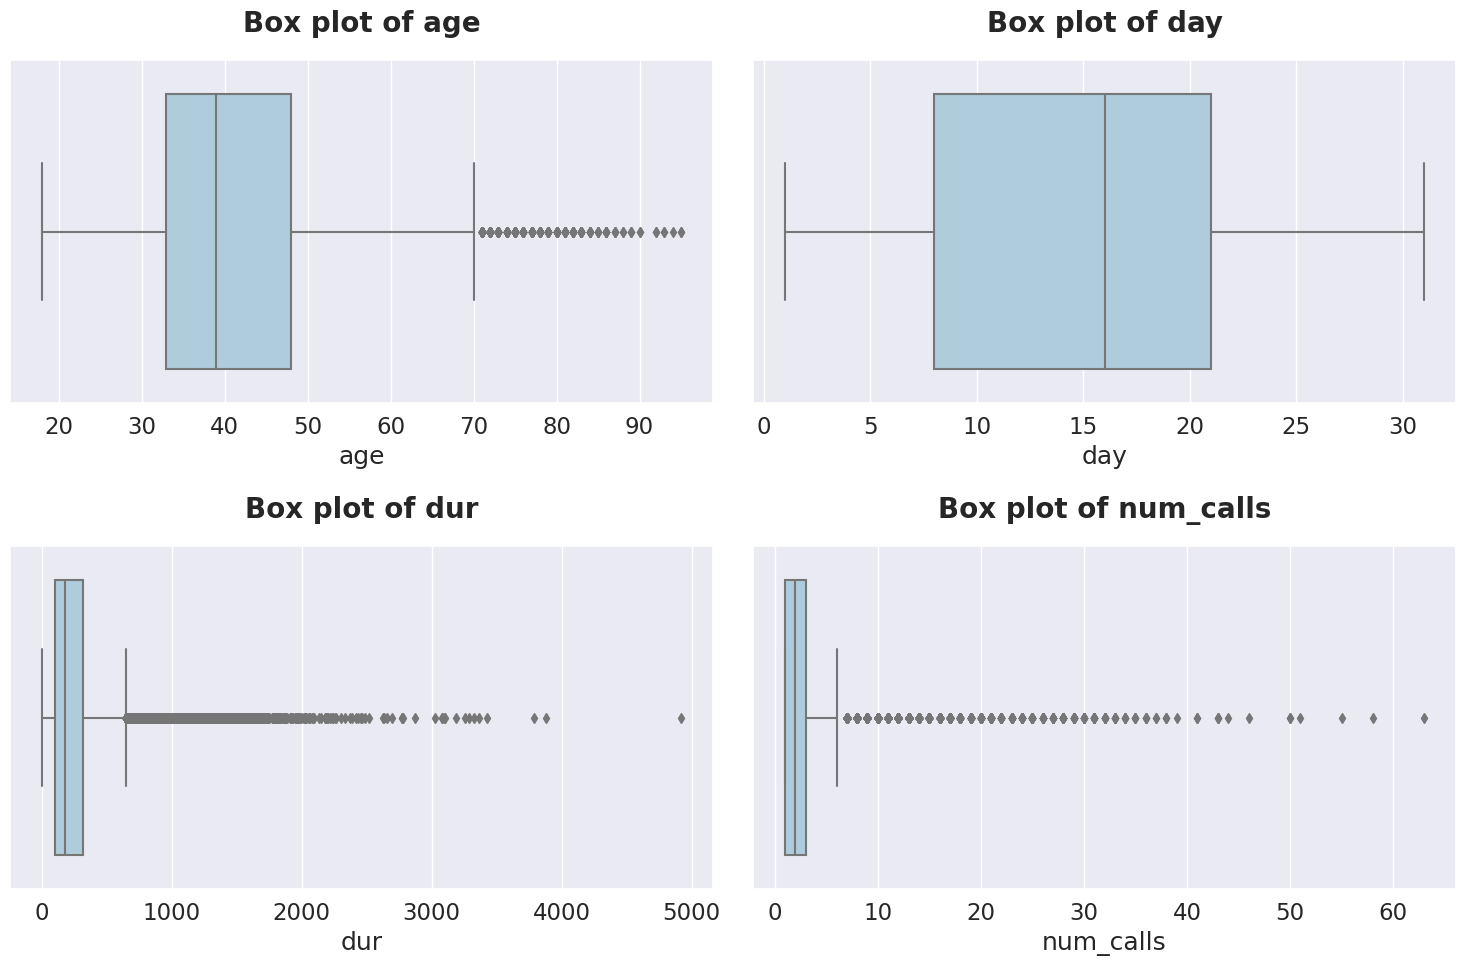

In [ ]:
Boxplot(['age', 'day', 'dur', 'num_calls'])

From the box plot, we can infer the presence of outliers.

removing outliers

In [ ]:
out_columns = ['age','dur', 'num_calls']
for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])
  IQR =  q3 - q1 #(75 - 25)
  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Lower = q1 + 1.5 * IQR  #(75 + 1.5 * IQR)
  print(f'{i} = IQR : {IQR}, Lower Threshold : {Lower}, Upper Threshold : {Upper}')

age = IQR : 15.0, Lower Threshold : 55.5, Upper Threshold : 70.5
dur = IQR : 216.0, Lower Threshold : 427.0, Upper Threshold : 643.0
num_calls = IQR : 2.0, Lower Threshold : 4.0, Upper Threshold : 6.0


In [ ]:
out_columns = ['age', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)

out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

,Column name,IQR,Lower Threshold,Upper Threshold
0,age,15.0,10.5,70.5
1,dur,216.0,-221.0,643.0
2,num_calls,2.0,-2.0,6.0


Cliping outliers

In [ ]:
out_columns = ['age', 'day', 'dur', 'num_calls']

IQR_value = []
Lower_Threshold = []
Upper_Threshold = []

for i in out_columns:
  q1,q3 = np.percentile(df[i],[25,75])

  IQR =  q3 - q1 #(75 - 25)
  IQR_value.append(IQR)

  Lower = q1 - 1.5 * IQR  #(75 - 1.5 * IQR)
  Lower_Threshold.append(Lower)

  Upper = q3 + 1.5 * IQR  #(75 + 1.5 * IQR)
  Upper_Threshold.append(Upper)
  df[i] = df[i].clip(Lower,Upper)
out = {'Column name' : out_columns, 'IQR' : IQR_value, 'Lower Threshold' : Lower_Threshold, 'Upper Threshold' : Upper_Threshold}
out_df = pd.DataFrame(out)
out_df

,Column name,IQR,Lower Threshold,Upper Threshold
0,age,15.0,10.5,70.5
1,day,13.0,-11.5,40.5
2,dur,216.0,-221.0,643.0
3,num_calls,2.0,-2.0,6.0


checking outliers after clipping

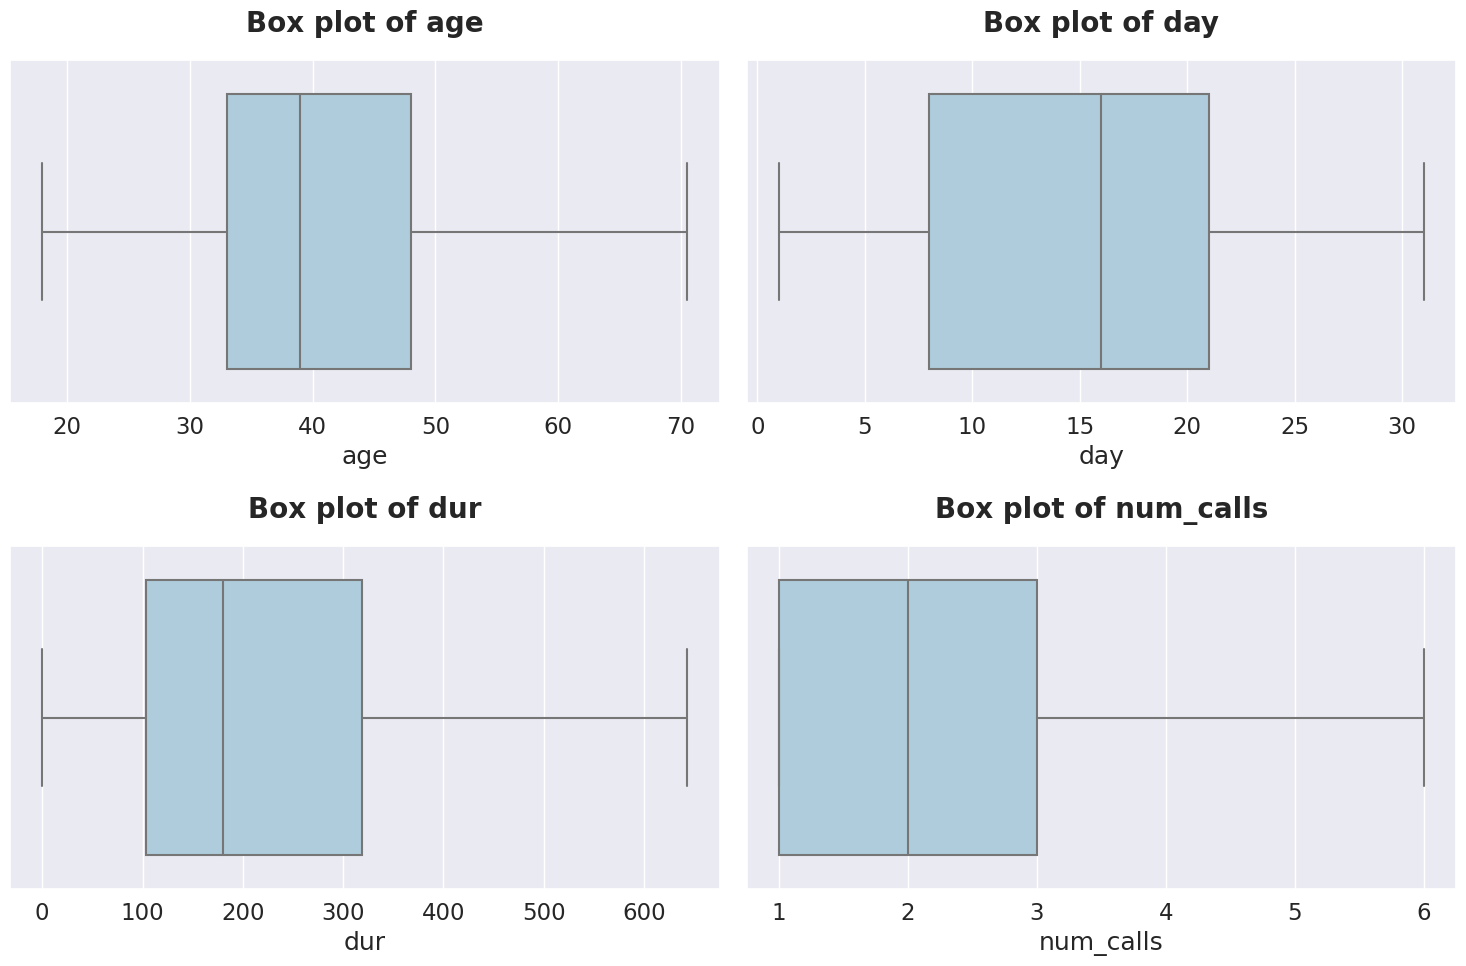

In [ ]:
Boxplot(['age', 'day', 'dur', 'num_calls'])

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


# **Exploratory Data Analysis (EDA)**

Target Variable ' y '

In [ ]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

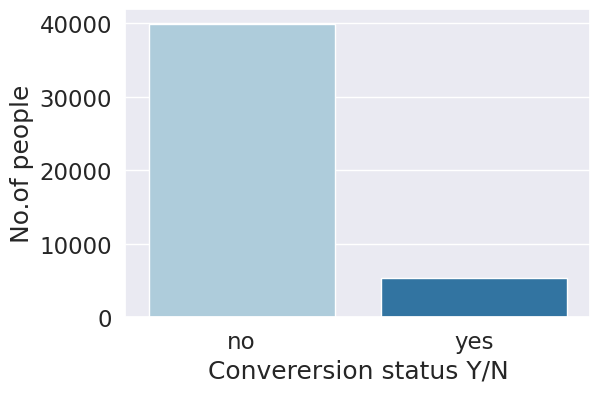

In [ ]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x=df['y'],palette='Paired')
plt.xlabel('Converersion status Y/N')
plt.ylabel('No.of people')
plt.show()

In [ ]:
print("percentage of no in the target variable : ",((39922)/(39922+5289))*100) # percentage of no in the target variable
print("percentage of yes in the target variable : ",((5289)/(39922+5289))*100)  # percentage of yes in the target variable

percentage of no in the target variable :  88.30151954170445
percentage of yes in the target variable :  11.698480458295547


* Based on our analysis, we have determined that the given data is imbalanced.
* The target column exhibits class imbalance,
      majority class representing "no" - (88.30%) 
      minority class representing "yes" - (11.69%).

Categorical Features

In [ ]:
categorical_columns = df.select_dtypes(exclude=np.number)
categorical_columns.head(5)

,job,marital,education_qual,call_type,mon,prev_outcome,y
0,management,married,tertiary,cellular,may,failure,no
1,technician,single,secondary,cellular,may,failure,no
2,entrepreneur,married,secondary,cellular,may,failure,no
3,blue-collar,married,secondary,cellular,may,failure,no
4,blue-collar,single,secondary,cellular,may,failure,no


In [ ]:
def categorical_features(col):
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette='Paired', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontweight='black', pad=20, fontsize=20)
    plt.xticks(rotation=90)

    total = len(df[col])
    for i in plt.gca().patches:
        height = i.get_height()
        percentage = f'{(height / total) * 100:.2f}%'
        plt.gca().annotate(percentage, (i.get_x() + i.get_width() / 2, height), ha='center', fontsize=8)

    plt.subplot(1, 2, 2)
    sns.countplot(x=col, hue='y', data=df, palette='Paired', order=df[col].value_counts().index)
    plt.title(f'{col} vs Target (y)', fontweight='black', pad=20, fontsize=20)
    plt.xticks(rotation=90)

    for i in plt.gca().patches:
        height = i.get_height()
        percentage = f'{(height / total) * 100:.2f}%'
        plt.gca().annotate(percentage, (i.get_x() + i.get_width() / 2, height), ha='center',fontsize=8)

    plt.tight_layout()
    plt.show()


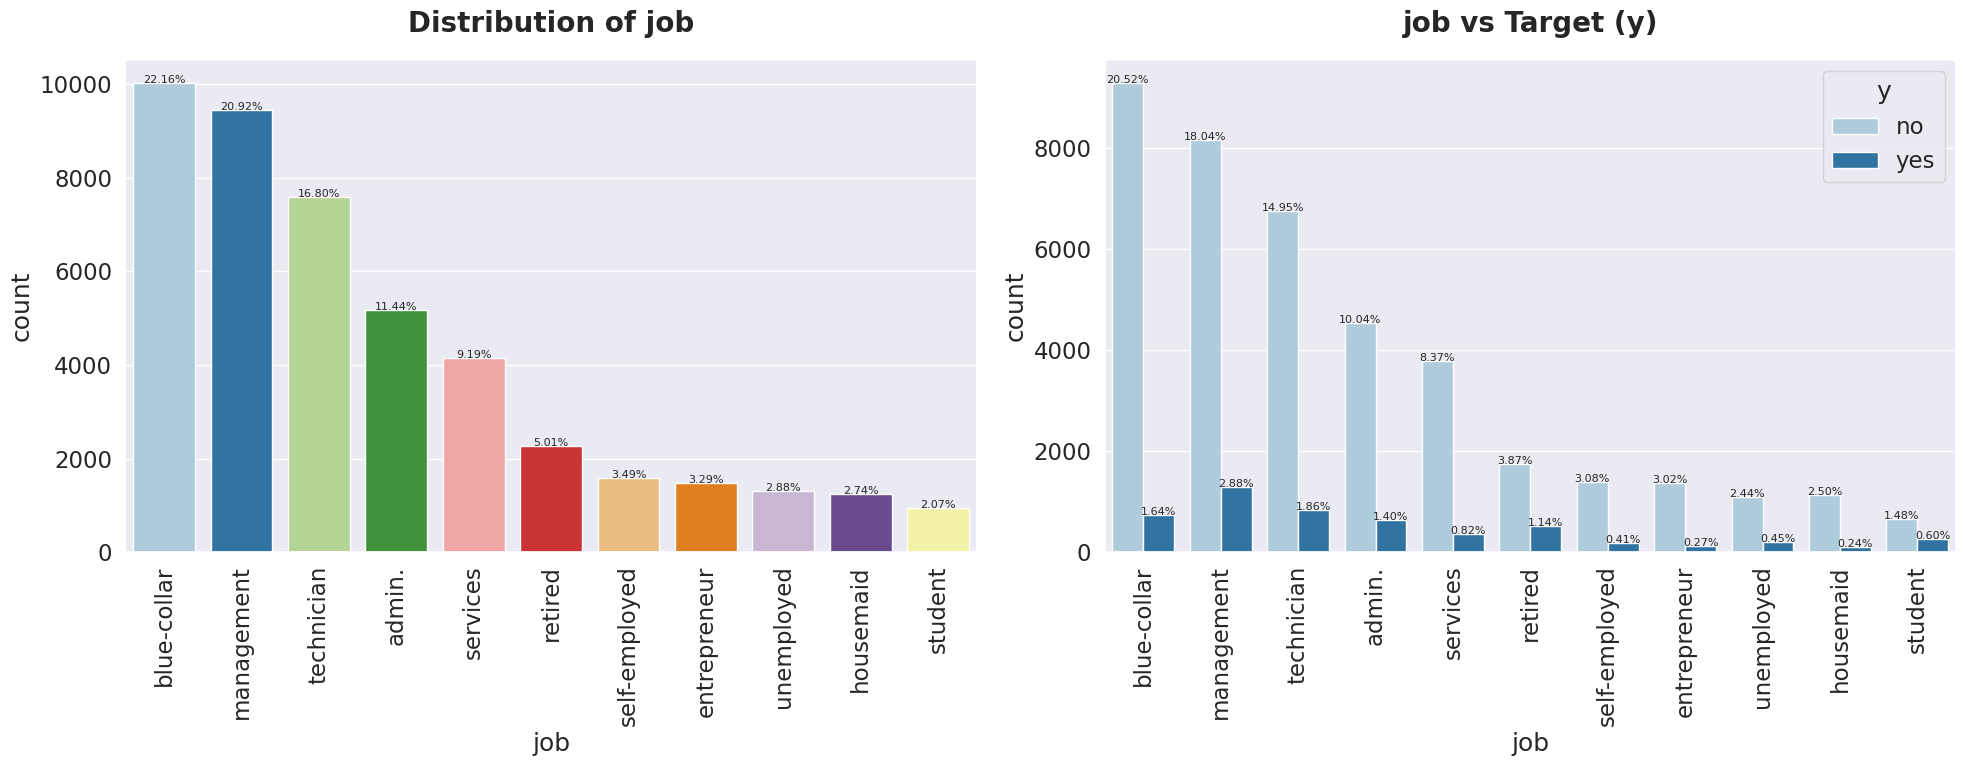

In [ ]:
categorical_features('job')

* The top three professions that our customers belongs to are
 1. Management
 2. blue-collar jobs 
 3. technicians.

* Customers having management jobs form the majority amongst those who have converted most.

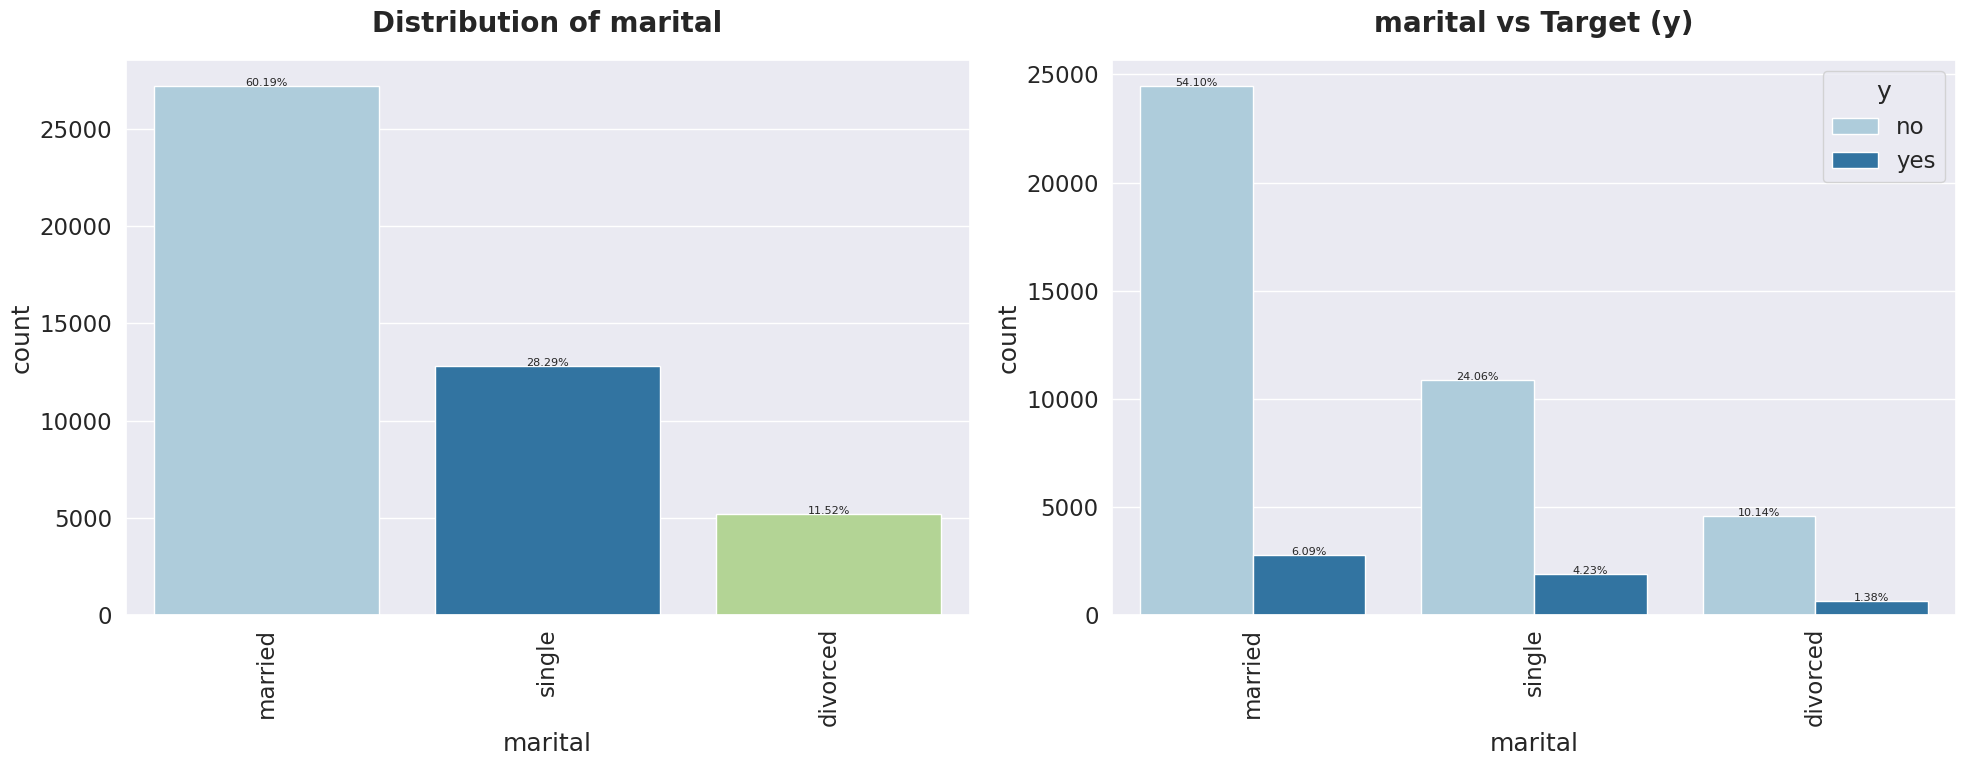

In [ ]:
categorical_features('marital')

majority of the customers are married

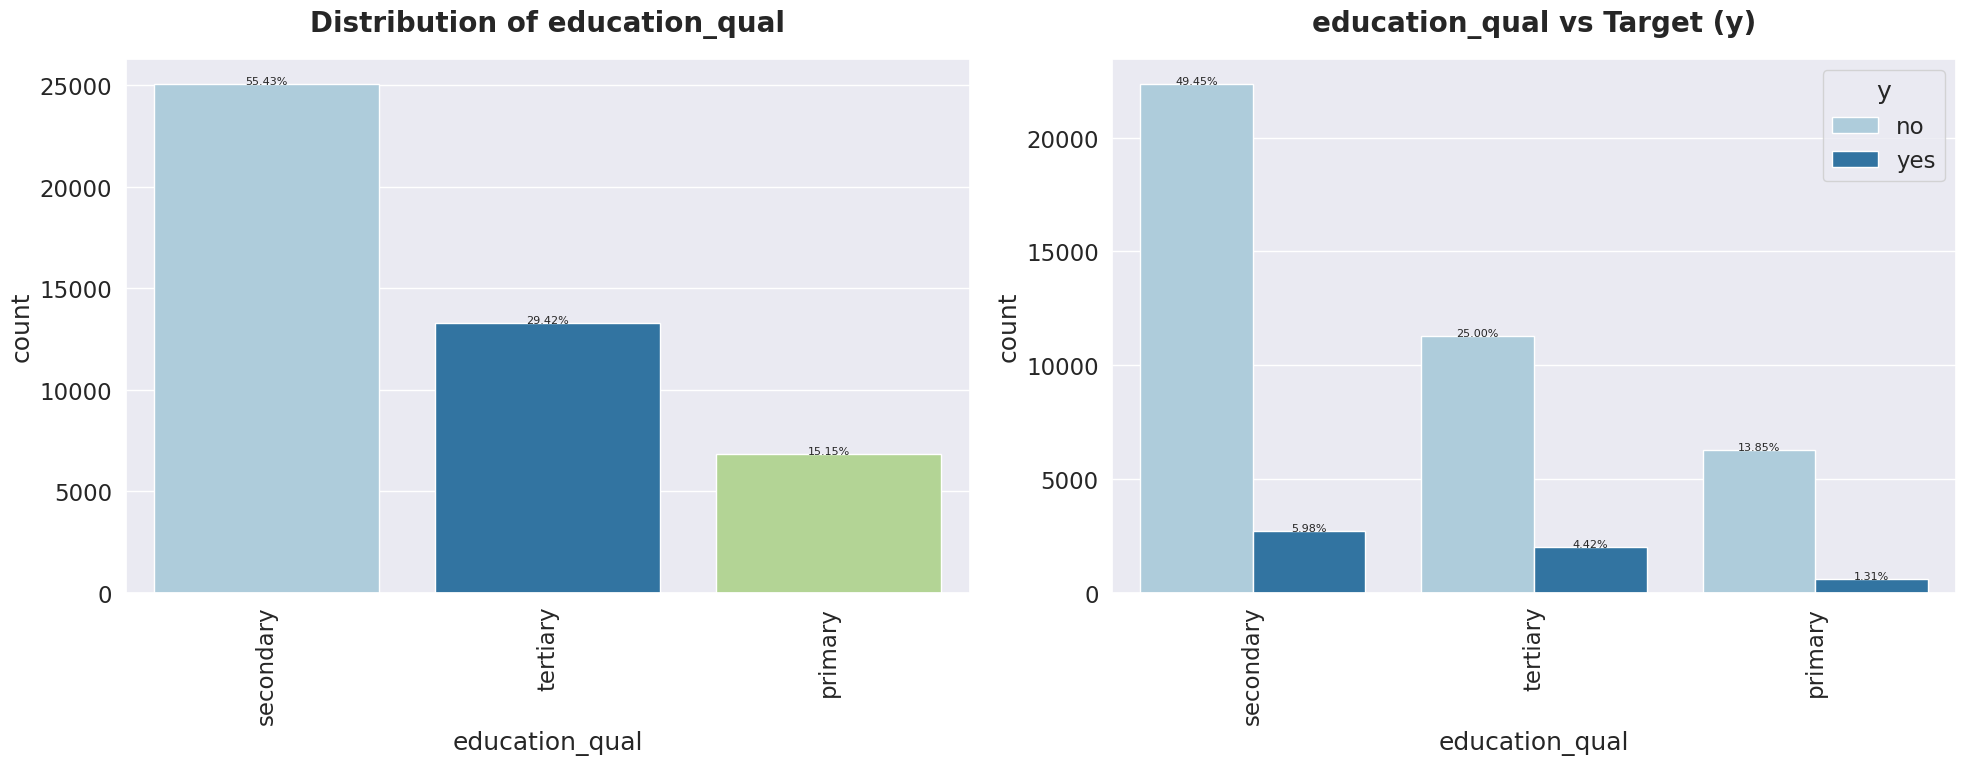

In [ ]:
categorical_features('education_qual')

The proportion of individuals with a secondary education level is higher. Moreover, a significant number of individuals who are qualified with a secondary education level have been converted.

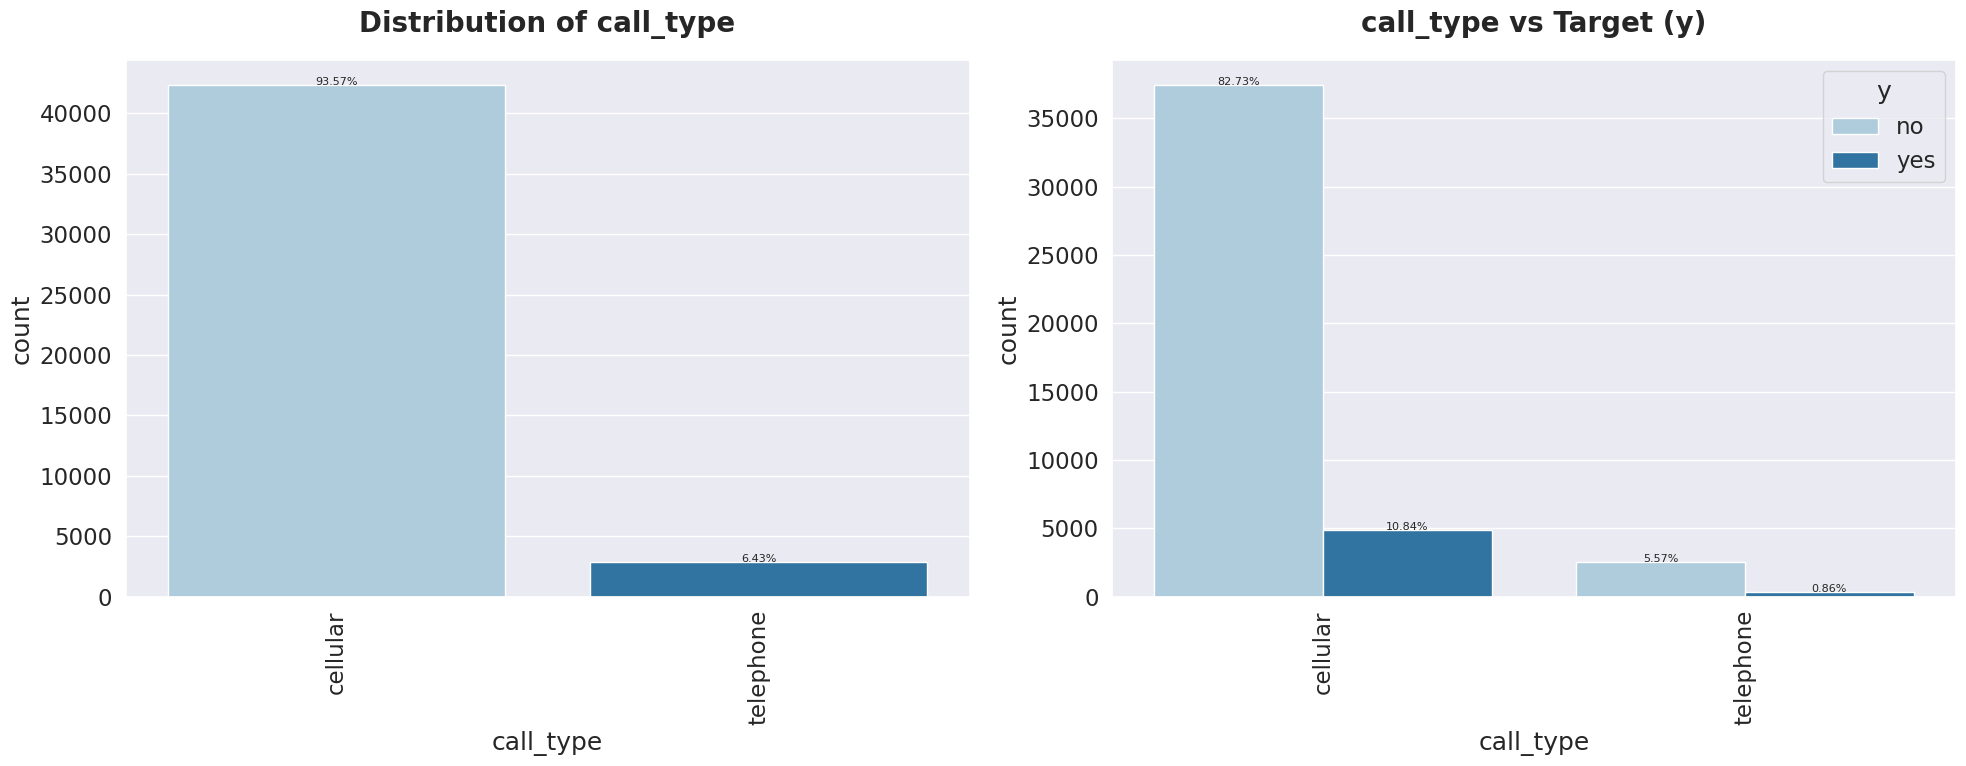

In [ ]:
categorical_features('call_type')

The cellular type is the most commonly used communication method among customers. Cell phones are the preferred mode of contact when reaching out to customers.
A higher number of customers who use cellphones have been converted.

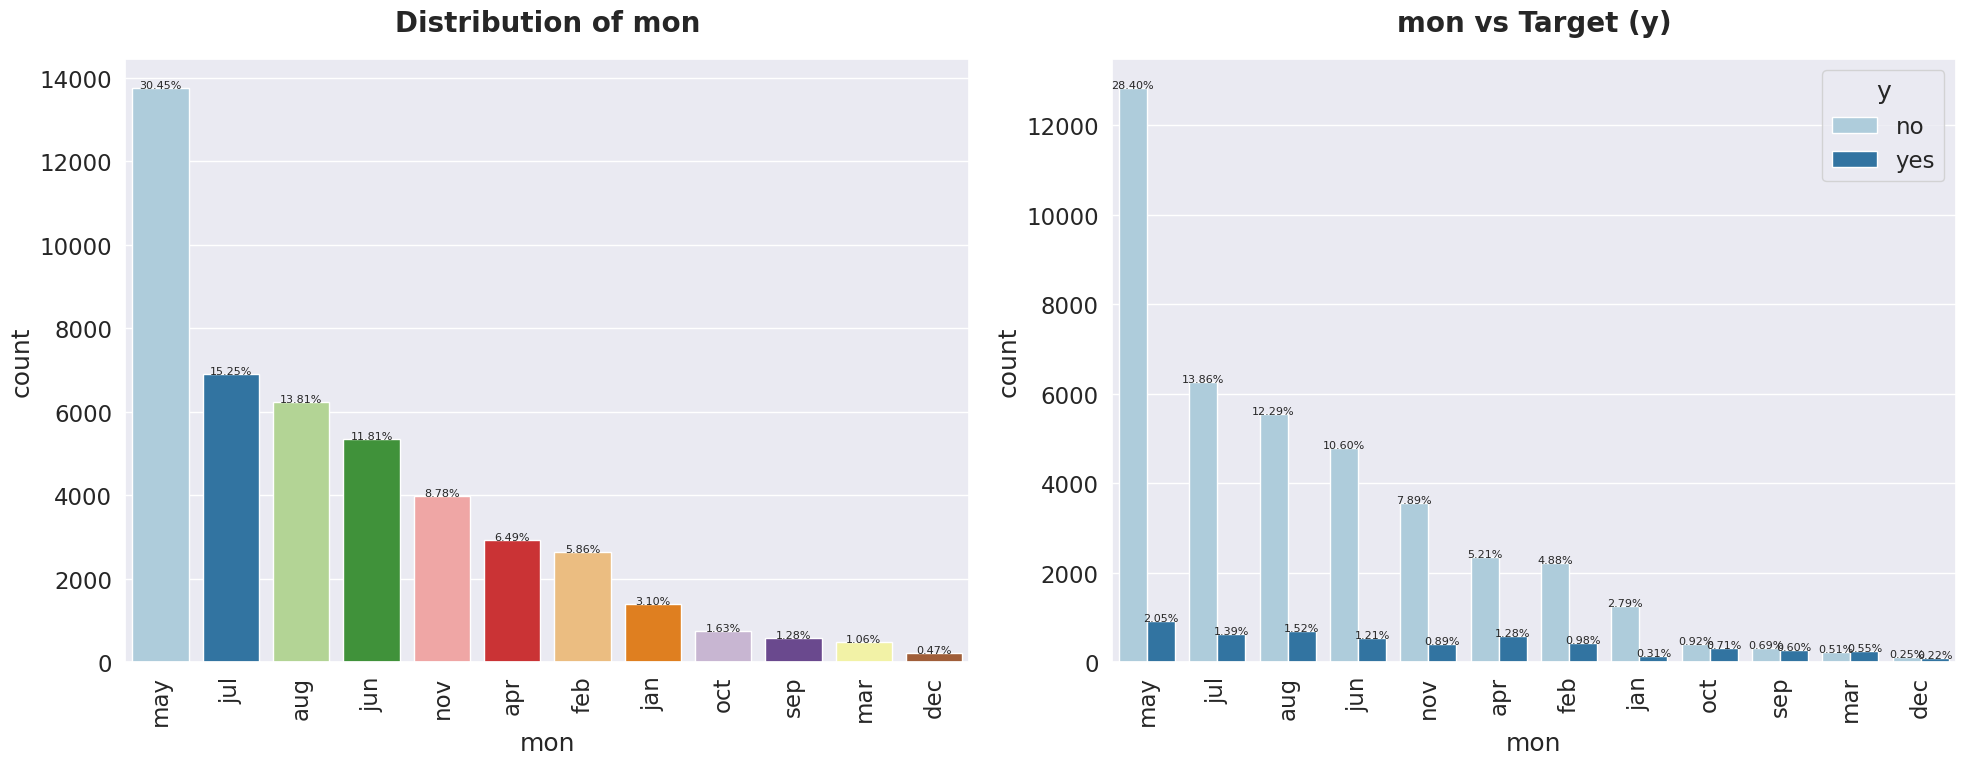

In [ ]:
categorical_features('mon')

May is the preferred month for contacting customers.
A significant number of customers have been successfully contacted during this month.

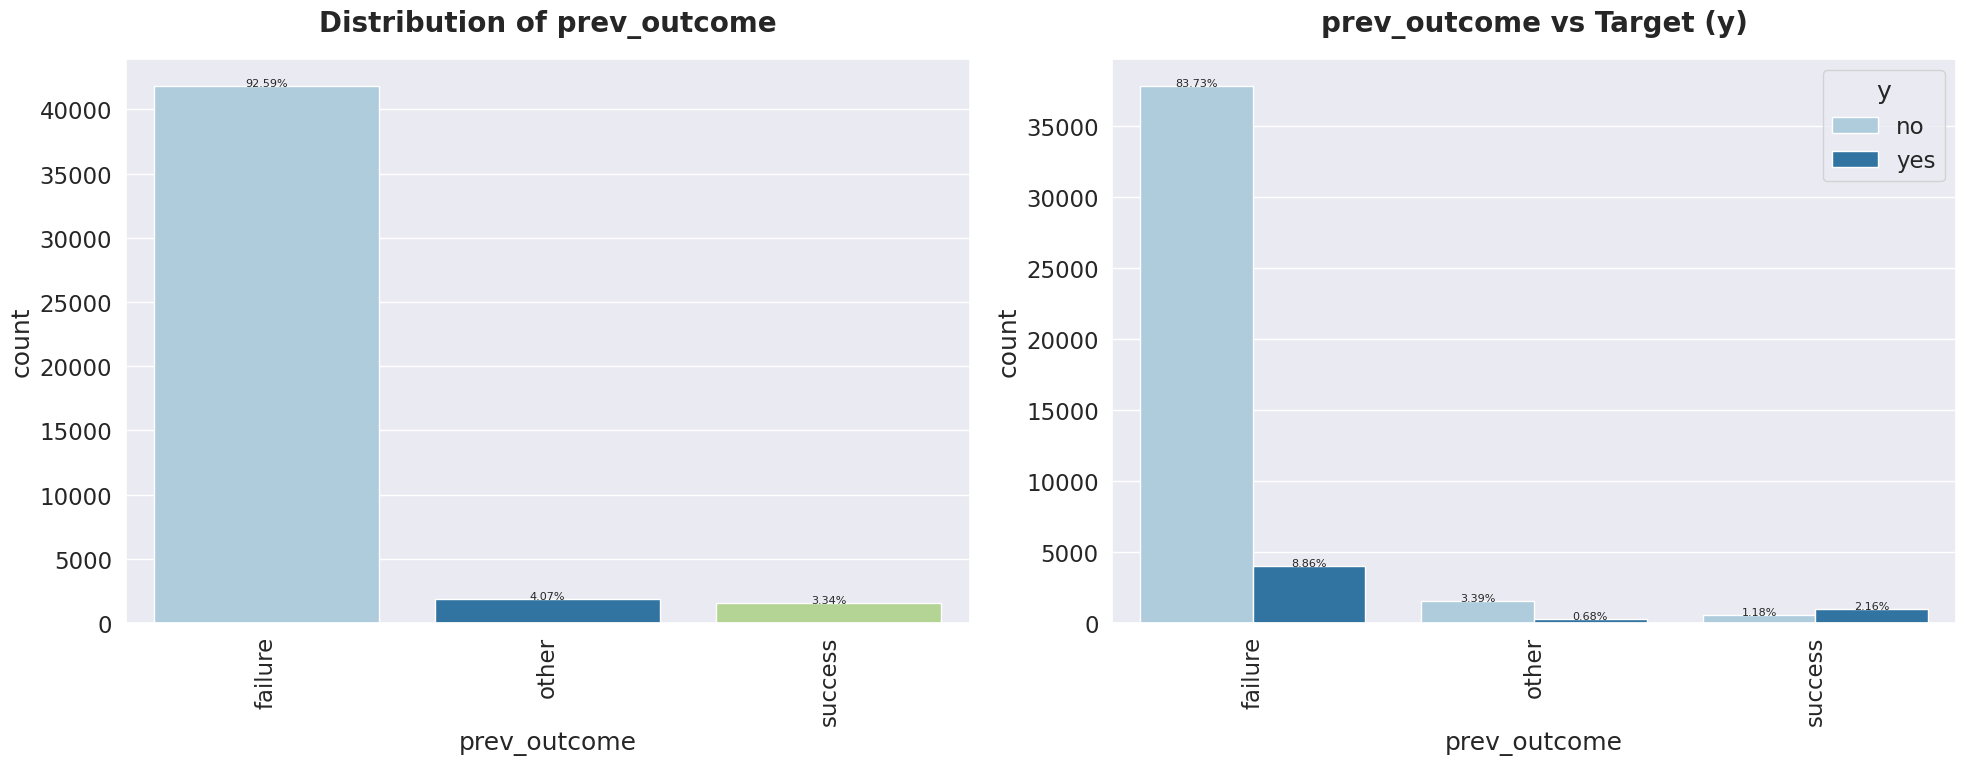

In [ ]:
categorical_features('prev_outcome')

Numerical Features

In [ ]:
numerical_columns = df.select_dtypes(include=np.number)
numerical_columns.head(5)

,age,day,dur,num_calls
0,58.0,5,261,1
1,44.0,5,151,1
2,33.0,5,76,1
3,47.0,5,92,1
4,33.0,5,198,1


In [ ]:
def Numerical_features(col):
  plt.figure(figsize=(20,17))
  x=1
  for i in col:
    plt.subplot(2,2,x)
    sns.histplot(x=i, hue='y', data=df, kde=True, edgecolor='black')
    plt.title(f'Histogram of {i}', fontweight='black', pad=10, fontsize=20 )
    plt.xticks(rotation=90)
    x += 1

plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

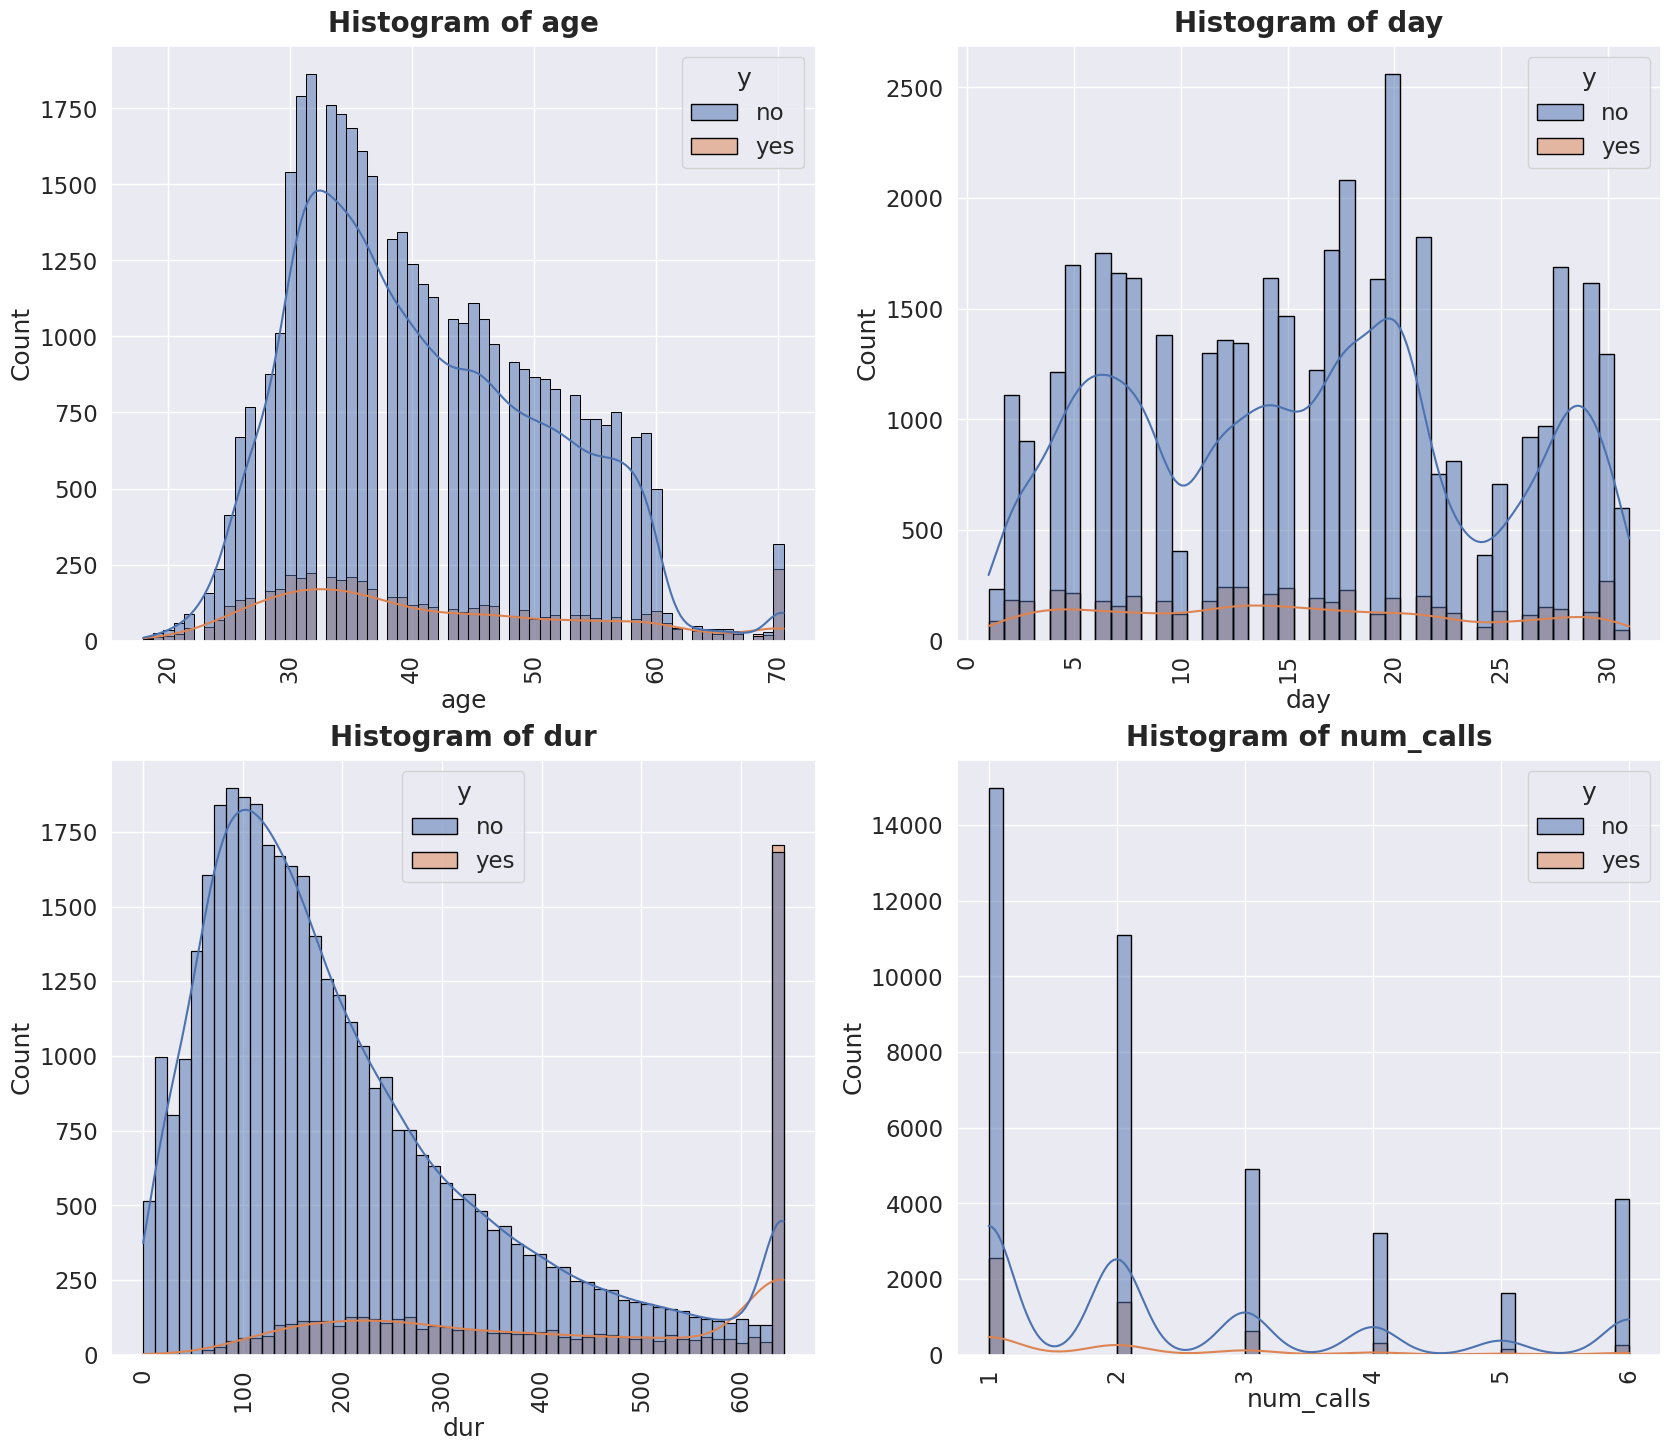

In [ ]:
Numerical_features(['age', 'day', 'dur', 'num_calls'])

# **Encoding**

In [ ]:
#column 'y'
df['y'] = df['y'].map({'no':0, 'yes':1})

<function matplotlib.pyplot.show(close=None, block=None)>

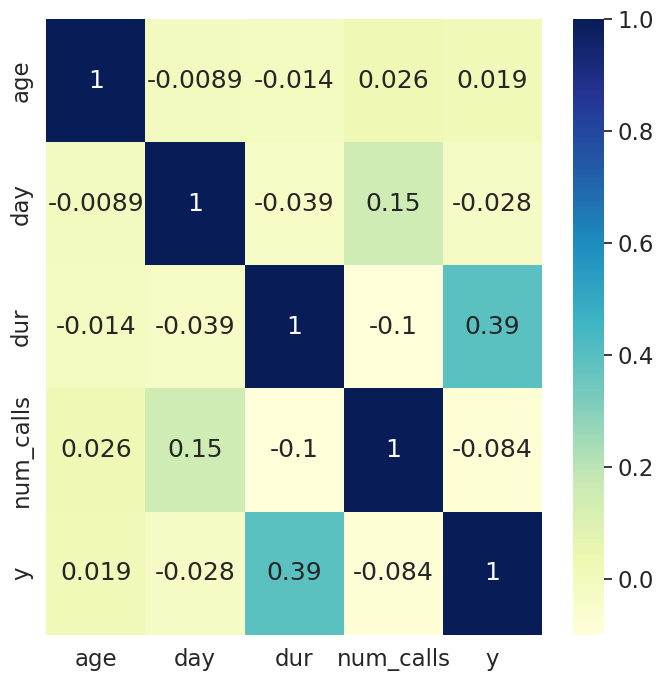

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show

**There are no features that are highly correlated and inversely correlated.**

In [ ]:
cc = df.select_dtypes(exclude = np.number).columns
cc

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')

In [ ]:
label_encoder = LabelEncoder()
df['mon'] = label_encoder.fit_transform(df['mon'])

In [ ]:
df = pd.get_dummies(columns=['job','marital','education_qual','call_type','prev_outcome'], data=df)

In [ ]:
df.head()

,age,day,mon,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_qual_primary,education_qual_secondary,education_qual_tertiary,call_type_cellular,call_type_telephone,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58.0,5,8,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
1,44.0,5,8,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0
2,33.0,5,8,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
3,47.0,5,8,92,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
4,33.0,5,8,198,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0


# **Sampling**

* The imbalanced class distribution in the target variable, with approximately 89% for the majority class and 11% for the minority class, it is necessary to perform resampling to address the imbalance.

In [ ]:
X_S = df.drop(['y'],axis=1)
y_S = df['y']

In [ ]:
smote = SMOTEENN(sampling_strategy="all")
X,y = smote.fit_resample(X_S,y_S)

In [ ]:
print(len(X),len(y))

66160 66160


In [ ]:
y.value_counts()

1    37995
0    28165
Name: y, dtype: int64

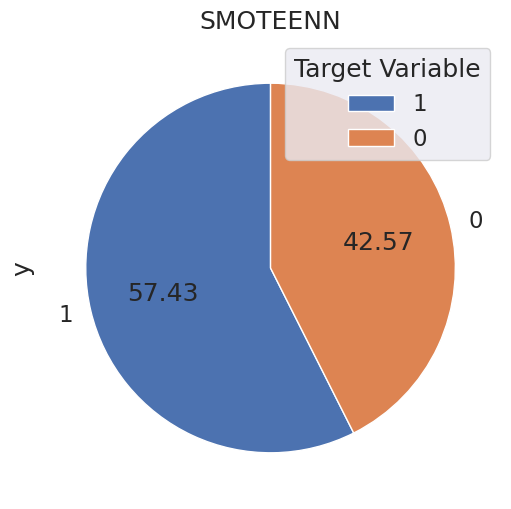

In [ ]:
plt.figure(figsize=(6,6))
y.value_counts().plot.pie(autopct='%.2f',startangle = 90)  
plt.title("SMOTEENN") 
plt.legend(title = "Target Variable")
plt.show()   

# **Splitting**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scaling**

In [ ]:
df.head()

,age,day,mon,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_qual_primary,education_qual_secondary,education_qual_tertiary,call_type_cellular,call_type_telephone,prev_outcome_failure,prev_outcome_other,prev_outcome_success
0,58.0,5,8,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0
1,44.0,5,8,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0
2,33.0,5,8,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
3,47.0,5,8,92,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
4,33.0,5,8,198,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
print(X_train)

[[ 1.57525298 -0.76659529  0.22447958 ...  0.55156464 -0.15172434
  -0.21333544]
 [ 1.04515897  1.76029237  0.86997193 ...  0.55156464 -0.15172434
  -0.21333544]
 [ 0.61792474  0.7976685   0.54722576 ...  0.55156464 -0.15172434
  -0.21333544]
 ...
 [-1.37325254 -1.24790722 -1.06650514 ... -1.81302414 -0.15172434
  -0.21333544]
 [-0.81017009 -0.88692327  0.86997193 ...  0.55156464 -0.15172434
  -0.21333544]
 [ 0.16166894  1.39930842 -1.38925132 ...  0.55156464 -0.15172434
  -0.21333544]]


In [ ]:
print(X_test)

[[-0.81017009 -0.04462739 -1.71199749 ...  0.55156464 -0.15172434
  -0.21333544]
 [-1.2519151   1.15865245 -0.0982666  ...  0.55156464 -0.15172434
  -0.21333544]
 [ 1.21743098  0.43668455  0.22447958 ...  0.55156464 -0.15172434
  -0.21333544]
 ...
 [ 0.03040467 -0.28528335  0.86997193 ...  0.55156464 -0.15172434
  -0.21333544]
 [ 1.51344348 -0.76659529  0.22447958 ...  0.55156464 -0.15172434
  -0.21333544]
 [ 0.42671595  0.43668455  0.22447958 ...  0.55156464 -0.15172434
  -0.21333544]]


# **Model Building**

### **Logistic Regression**

In [ ]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train)
y_pred_lr = Logistic_Regression.predict(X_test)

lr_AUROC = roc_auc_score(y_test, y_pred_lr)*100
lr_Acu = accuracy_score(y_test, y_pred_lr)*100
lr_f1 = f1_score(y_test, y_pred_lr)



print( "AUROC OF Sampled Logistic Regression : ", roc_auc_score(y_test, Logistic_Regression.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Logistic Regression : ", lr_f1 )
print("Accuracy OF Logistic Regression : ", lr_Acu)
print("AUROC OF Logistic Regression : ", lr_AUROC)

AUROC OF Sampled Logistic Regression :  98.80391990975946
F1 SCORE OF Logistic Regression :  0.9557134320430251
Accuracy OF Logistic Regression :  94.95918984280533
AUROC OF Logistic Regression :  95.1751425175483


In [ ]:
cmL = confusion_matrix(y_test, y_pred_lr)
cmL

array([[5368,  193],
       [ 474, 7197]])

### **Decision Tree Classifier**

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10]:
  Decision_Tree = DecisionTreeClassifier(max_depth=depth)
  Decision_Tree.fit(X_train, y_train)
  Decision_Tree = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(Decision_Tree, X_test, y_test, cv=10)
  print("Depth  : ", depth,"---------", " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1 ---------  Cross val score :  0.7901309735038694
Depth  :  2 ---------  Cross val score :  0.8246679134896657
Depth  :  3 ---------  Cross val score :  0.8394036600877343
Depth  :  4 ---------  Cross val score :  0.8589039946290701
Depth  :  5 ---------  Cross val score :  0.8771170871839841
Depth  :  6 ---------  Cross val score :  0.8859591973748211
Depth  :  7 ---------  Cross val score :  0.9011498859362476
Depth  :  8 ---------  Cross val score :  0.9086313948204323
Depth  :  9 ---------  Cross val score :  0.9148282878105926
Depth  :  10 ---------  Cross val score :  0.9192872785233597


In [ ]:
Decision_Tree = DecisionTreeClassifier(max_depth=5)
Decision_Tree.fit(X_train, y_train)
y_pred_dt = Decision_Tree.predict(X_test)

dt_AUROC = roc_auc_score(y_test, y_pred_dt)*100
dt_Acu = accuracy_score(y_test, y_pred_dt)*100
dt_f1 = f1_score(y_test, y_pred_dt)

print( "AUROC OF Sampled Decision_Tree  : ", roc_auc_score(y_test, Decision_Tree.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Decision_Tree : ", dt_f1 )
print("Accuracy OF Decision_Tree : ", dt_Acu )
print("AUROC OF Decision_Tree : ", dt_AUROC )

AUROC OF Sampled Decision_Tree  :  94.86963432855747
F1 SCORE OF Decision_Tree :  0.8961138899576759
Accuracy OF Decision_Tree :  87.75695284159613
AUROC OF Decision_Tree :  87.12589780904038


In [ ]:
cmD = confusion_matrix(y_test, y_pred_dt)
cmD

array([[4625,  936],
       [ 684, 6987]])

### **Random Forest Classifier**

In [ ]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)

rf_AUROC = roc_auc_score(y_test, y_pred_rf)*100
rf_Acu = accuracy_score(y_test, y_pred_rf)*100
rf_f1 = f1_score(y_test, y_pred_rf)


print( "AUROC OF Sampled Random_Forest  : ", roc_auc_score(y_test, Random_Forest.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Random_Forest : ", rf_f1 )
print("Accuracy OF Random_Forest : ", rf_Acu)
print("AUROC OF Random_Forest : ", rf_AUROC )

AUROC OF Sampled Random_Forest  :  99.42299565588803
F1 SCORE OF Random_Forest :  0.9686411149825784
Accuracy OF Random_Forest :  96.39510278113664
AUROC OF Random_Forest :  96.46303564235637


In [ ]:
cmR = confusion_matrix(y_test, y_pred_rf)
cmR

array([[5388,  173],
       [ 304, 7367]])

### **Gradient Boosting Classifier**

In [ ]:
Gradient_Boosting = GradientBoostingClassifier()
Gradient_Boosting.fit(X_train, y_train)
y_pred_gb = Gradient_Boosting.predict(X_test)

gb_AUROC = roc_auc_score(y_test, y_pred_gb)*100
gb_Acu = accuracy_score(y_test, y_pred_gb)*100
gb_f1 = f1_score(y_test, y_pred_gb)

print( "AUROC OF Sampled Gradient_Boosting  : ", roc_auc_score(y_test, Gradient_Boosting.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF Gradient_Boosting : ", gb_f1 )
print("Accuracy OF Gradient_Boosting : ", gb_Acu )
print("AUROC OF Gradient_Boosting : ", gb_AUROC )

AUROC OF Sampled Gradient_Boosting  :  98.87202250828213
F1 SCORE OF Gradient_Boosting :  0.9540836521968596
Accuracy OF Gradient_Boosting :  94.74002418379686
AUROC OF Gradient_Boosting :  94.8303115039557


In [ ]:
cmG = confusion_matrix(y_test, y_pred_gb)
cmG

array([[5305,  256],
       [ 440, 7231]])

### **XGB Classifier**

In [ ]:
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, y_train)
y_pred_xgb = XGB_Classifier.predict(X_test)

xgb_AUROC = roc_auc_score(y_test, y_pred_xgb)*100
xgb_Acu = accuracy_score(y_test, y_pred_xgb)*100
xgb_f1 = f1_score(y_test, y_pred_xgb)

print("AUROC OF Sampled XGB_Classifier  : ", roc_auc_score(y_test, XGB_Classifier.predict_proba(X_test)[:,1])*100)
print("F1 SCORE OF XGB_Classifier : ", xgb_f1)
print("Accuracy OF XGB_Classifier : ", xgb_Acu)
print("AUROC OF XGB_Classifier : ", xgb_AUROC)

AUROC OF Sampled XGB_Classifier  :  99.47679510294225
F1 SCORE OF XGB_Classifier :  0.9710830704521557
Accuracy OF XGB_Classifier :  96.67472793228536
AUROC OF XGB_Classifier :  96.74377381577864


In [ ]:
cmX = confusion_matrix(y_test, y_pred_xgb)
cmX

array([[5404,  157],
       [ 283, 7388]])

In [ ]:
final_data = pd.DataFrame({
    'Models':['Logistic_Regression','Decision_Tree','Random_Forest','Gradient_Boosting','XGB'],
    'Accuracy':[lr_f1,dt_f1,rf_f1,gb_f1,xgb_f1],
    "F1":[lr_Acu,dt_Acu,rf_Acu,gb_Acu,xgb_Acu],
    "ROC_Auc":[lr_AUROC,dt_AUROC,rf_AUROC,gb_AUROC,xgb_AUROC]
})

In [ ]:
final_data

,Models,Accuracy,F1,ROC_Auc
0,Logistic_Regression,0.955713,94.959190,95.175143
1,Decision_Tree,0.896114,87.756953,87.125898
2,Random_Forest,0.968641,96.395103,96.463036
3,Gradient_Boosting,0.954084,94.740024,94.830312
4,XGB,0.971083,96.674728,96.743774


# **Feature Importances**

In [ ]:
feature_importances = pd.DataFrame(Random_Forest.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(7)

,importance
dur,0.400575
prev_outcome_failure,0.096870
age,0.063579
mon,0.045286
day,0.044737
num_calls,0.039118
job_blue-collar,0.034160


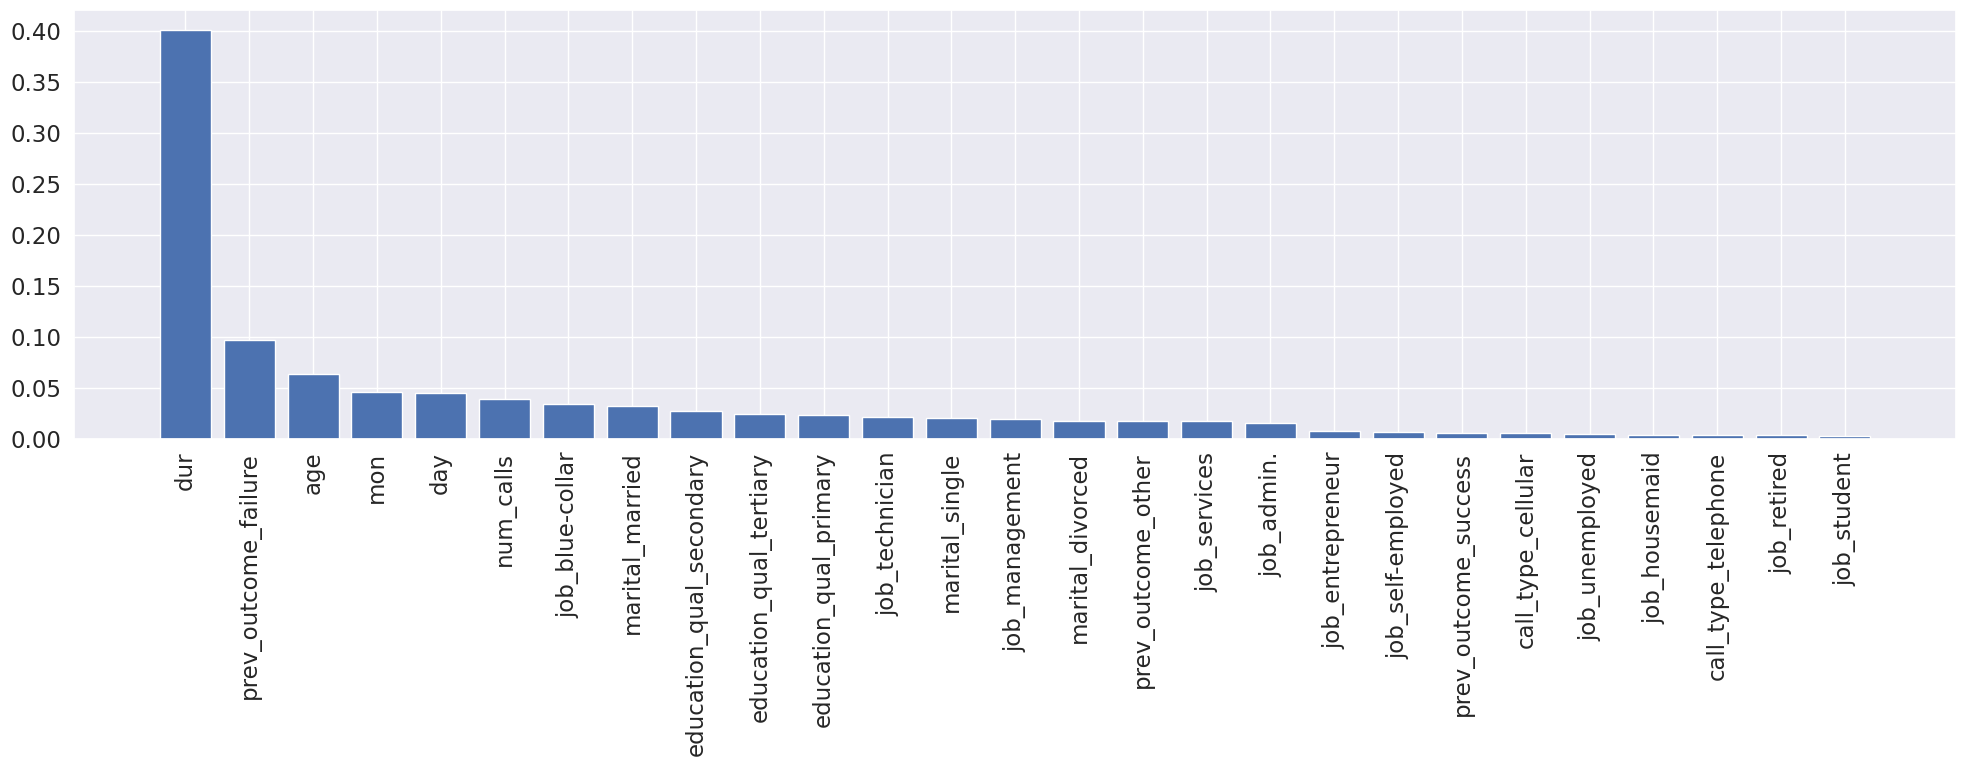

In [ ]:
feature_names = X.columns
importances = Random_Forest.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.bar(sorted_feature_names, sorted_importances)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
